In [1]:
import numpy as np
import argparse
import time
import os
import functools

import torch
from config.config import get_arguments
from utils.functions import *
from utils.loader import *
from utils.runner import *
from utils.augmentation import JitAugment, RandAug

from albumentations.pytorch import ToTensorV2

import matplotlib.pyplot as plt
from matplotlib import gridspec

/home/dima/torch/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
opt = argparse.Namespace(dir_path='imgs/',
                        dir_test_path='test_imgs/',
                        not_cuda = 0,
                        manualSeed=6676,
                        #is_mask=True,
                        gpu=0,
                        min_size=25,
                        max_size=256,
                        scale_factor=0.75,
                        img_shape=(256, 256),
                        num_data=16,
                        batch_size=4,
                        losses = ['ssim11','mse'],         #['ssim11'], ['ssim11','mse'],
                        scale_num=1,
                        beta1=0.5,
                        beta2=0.999,
                        niter=300,
                        d_niter=100,
                        pixel_shuffle_p=0.005,
                        nc_im=3,
                        nfc=128,
                        nfg=64,
                        z_dim=100,
                        lr=1e-4
                        )
opt = post_config(opt)

In [3]:
dir2save = generate_dir2save(opt)
runner = Runner(PathologyLoader, dir2save, opt)

Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: /home/dima/torch/lib/python3.8/site-packages/lpips/weights/v0.1/vgg.pth


In [ ]:
runner.train_d()

  0%|                                                        | 0/100 [00:00<?, ?it/s]/home/dima/torch/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
 76%|█████████████████████████▊        | 76/100 [00:04<00:01, 15.30it/s, loss=0.0016]

In [ ]:
# runner.niter = 100
runner.train_self()

In [ ]:
#runner.train()

In [ ]:
trained_net = runner.net_gen
trained_d = runner.d_net

In [ ]:
train_loader_iter = runner.train_loader_iter

In [ ]:
test_loader_iter = runner.test_loader_iter

In [ ]:
x, l = next(train_loader_iter)
t, lt = next(test_loader_iter)

In [ ]:
l, lt

In [ ]:
fig = plt.figure(figsize=(10,10))
rows = 4
cols = 1
spec = gridspec.GridSpec(ncols=4, nrows=1)

for i in range(rows):
    ax = fig.add_subplot(spec[i])
    ax.imshow(convert_image_np(x[i].detach()))
    
fig = plt.figure(figsize=(15,15))
rows = 4
cols = 4
spec = gridspec.GridSpec(ncols=cols, nrows=rows)

for i in range(rows):
    infer = trained_net(x.cuda(), torch.eye(4)[torch.tensor([l[i]]*rows)].cuda())
    for j in range(cols):
        ax = fig.add_subplot(spec[i*rows + j])
        ax.imshow(convert_image_np(infer[j].detach()))

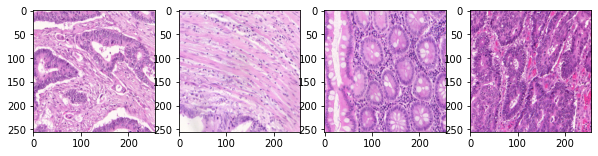

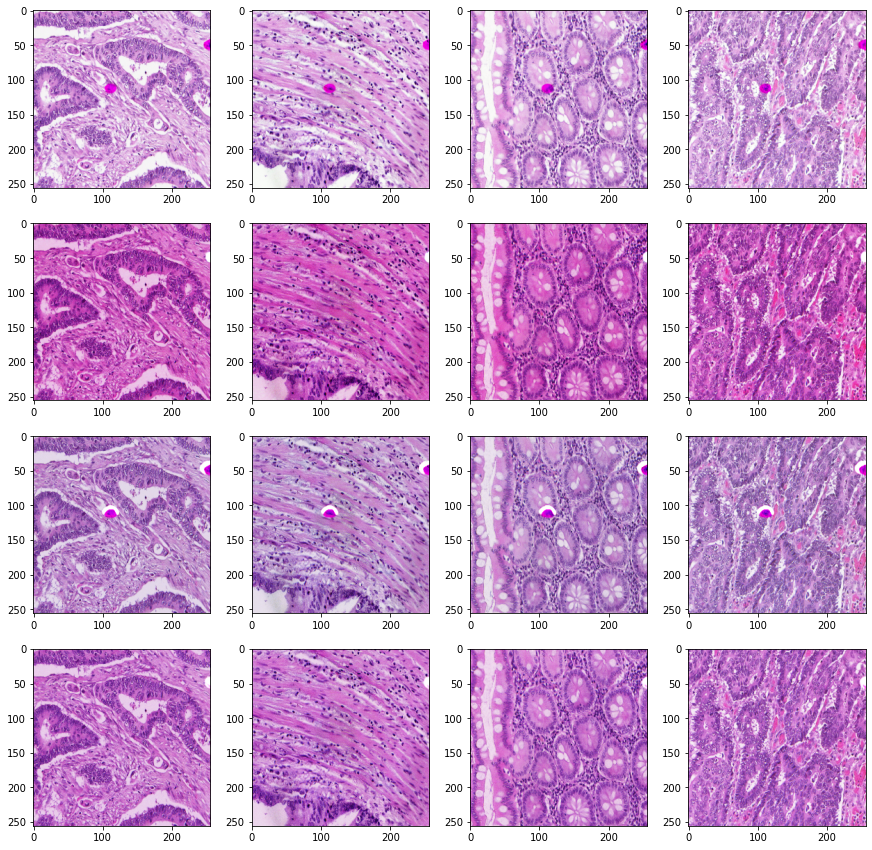

In [23]:
fig = plt.figure(figsize=(10,10))
rows = 4
cols = 1
spec = gridspec.GridSpec(ncols=4, nrows=1)

for i in range(rows):
    ax = fig.add_subplot(spec[i])
    ax.imshow(convert_image_np(t[i].detach()))
    
fig = plt.figure(figsize=(15,15))
rows = 4
cols = 4
spec = gridspec.GridSpec(ncols=4, nrows=4)

for i in range(rows):
    infer = trained_net(t.cuda(), torch.eye(4)[torch.tensor([l[i]]*4)].cuda())
    for j in range(cols):
        ax = fig.add_subplot(spec[i*rows + j])
        ax.imshow(convert_image_np(infer[j].detach()))

In [18]:
sour_idx = 3
tar_idx = 3

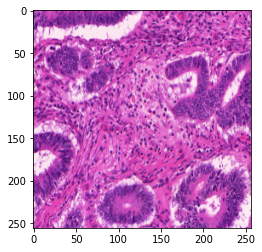

In [19]:
plt.imshow(convert_image_np(x[sour_idx]))

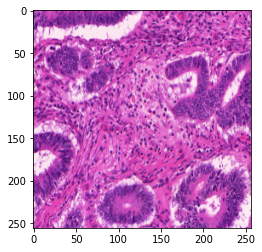

In [20]:
plt.imshow(convert_image_np(x[tar_idx]))

In [21]:
infer = trained_net(x[sour_idx:sour_idx+1].cuda(), torch.eye(4)[tar_idx].cuda())
print(f'target : {tar_idx}, results: {torch.argmax(trained_d(infer)).item()}')

target : 3, results: 2


In [48]:
rec = trained_net(infer, torch.eye(4)[sour_idx].cuda())
print(f'source : {sour_idx}, results: {torch.argmax(trained_d(rec)).item()}')

source : 3, results: 2


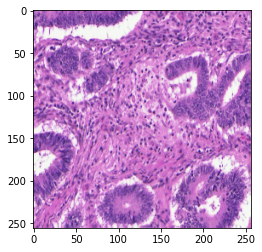

In [52]:
plt.imshow(convert_image_np(infer[0].detach()))

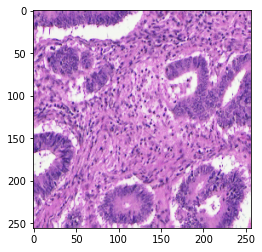

In [50]:
plt.imshow(convert_image_np(rec[0].detach()))

In [87]:
convert_image_np(infer[0].detach())

array([[[0.648128  , 0.35189486, 0.7319766 ],
        [0.5387777 , 0.26718485, 0.6675034 ],
        [0.5694376 , 0.25958395, 0.6148258 ],
        ...,
        [0.42383507, 0.17399979, 0.49625295],
        [0.68836105, 0.32081336, 0.5982884 ],
        [0.70567006, 0.31529075, 0.6941479 ]],

       [[0.46081924, 0.25663042, 0.5224425 ],
        [0.51033777, 0.28528252, 0.6663796 ],
        [0.57400995, 0.3222199 , 0.64974976],
        ...,
        [0.55394834, 0.24553955, 0.56871784],
        [0.8094421 , 0.40400127, 0.74708384],
        [0.667033  , 0.36821094, 0.67442644]],

       [[0.5597406 , 0.28233635, 0.647527  ],
        [0.67163944, 0.37822154, 0.762704  ],
        [0.66389513, 0.36994582, 0.74410504],
        ...,
        [0.7214941 , 0.33500814, 0.7370641 ],
        [0.7106326 , 0.38443968, 0.7490804 ],
        [0.5902001 , 0.2512399 , 0.7338129 ]],

       ...,

       [[0.86750853, 0.44141054, 0.8155757 ],
        [0.81434476, 0.40331757, 0.74689084],
        [0.7860007 , 0

In [44]:
trained_d(infer)

tensor([[8.0100, 3.5971, 8.7610, 9.0502]], device='cuda:0',
       grad_fn=<ReshapeAliasBackward0>)

In [17]:
trained_d(rec)

tensor([[1.1258, 2.6227, 7.5495, 2.6084]], device='cuda:0',
       grad_fn=<ReshapeAliasBackward0>)

In [21]:
import torch.nn as nn

In [47]:
ce = nn.CrossEntropyLoss()

In [73]:
x = torch.eye(4)[0]
l = torch.tensor([[18.8399,  4.6291,  6.6840, 13.8463]])
k = torch.tensor(0)
# tensor(0, device='cuda:0')
xxx = torch.eye(4)[[k.unsqueeze(0)]]

In [74]:
x, l, k, xx, xxx

(tensor([1., 0., 0., 0.]),
 tensor([[18.8399,  4.6291,  6.6840, 13.8463]]),
 tensor(0),
 tensor([[1., 0., 0., 0.]]),
 tensor([[1., 0., 0., 0.]]))

In [75]:
ce(l ,xxx)

tensor(0.0068)

In [62]:
torch.tensor(0)

tensor(0)

In [64]:
torch.eye(4)[torch.tensor([0,0,0,0])]


tensor([[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.]])

In [33]:
trained_d(rec).shape

torch.Size([1, 4])

In [29]:
x.shape

torch.Size([1, 4])

In [32]:
ce(trained_d(rec),x.cuda())

tensor(10.4372, device='cuda:0', grad_fn=<DivBackward1>)

In [9]:
x

tensor([1., 0., 0., 0.])

In [111]:
torch.rand(1, 1, 1, 1) - 0.5

tensor([[[[-0.2447]]]])

In [21]:
arr = torch.randn([1,3,10,11])

In [34]:
def convert_image_np(inp):
    # if len(inp.shape) == 4:
    if inp.shape[1]==3:
        inp = denorm(inp)
        inp = move_to_cpu(inp[:,:,:,:])
        
        inp = inp.numpy().transpose((0,2,3,1))
        print(inp.shape)
    else:
        inp = denorm(inp)
        inp = move_to_cpu(inp[:,-1,:,:])
        inp = inp.numpy().transpose((0,1))
    # else:
    #     if inp.shape[0]==3:
    #         inp = denorm(inp)
    #         inp = move_to_cpu(inp[:,:,:])
    #         inp = inp.numpy().transpose((1,2,0))
    #     else:
    #         inp = denorm(inp)
    #         inp = move_to_cpu(inp[-1,:,:])
    #         inp = inp.numpy().transpose((0,1))

    inp = np.clip(inp,0,1)
    return inp

(1, 10, 11, 3)


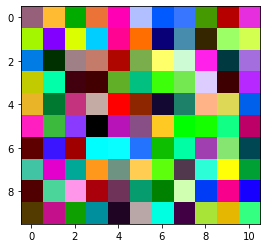

In [36]:
plt.imshow(convert_image_np(arr)[0])